**Sistemas de recomendación en Marketing**

📌 ¿Qué es un sistema de recomendación?
Un sistema de recomendación es mucho más que un motor de sugerencias es una herramienta de marketing que utiliza algoritmos avanzados para predecir y sugerir automáticamente productos, contenidos o servicios que podrían interesarle a un usuario, basándose en su historial de navegación, comportamiento de compra y similitudes con otros usuarios.

Desde una perspectiva de marketing, estos sistemas permiten:

-**Personalizar la experiencia del cliente en tiempo real**, mostrando recomendaciones relevantes en función de sus intereses.

-**Aumentar la tasa de conversión**, ya que el usuario encuentra lo que busca (o lo que no sabía que quería) más rápidamente.

-**Impulsar la fidelización y el valor del cliente (CLV)** al ofrecer contenido útil, promociones o productos complementarios.

-**Optimizar las campañas de marketing digital**, integrando recomendaciones en email marketing, landing pages, apps móviles y plataformas de e-commerce.  

📌 **Entendiendo un poco el contexto**
En este análisis, nos enfocamos en el desafío de aumentar la retención de usuarios en una plataforma de streaming mediante recomendaciones personalizadas. El objetivo es ofrecer a cada usuario sugerencias de películas que no solo atraigan su atención, sino que maximicen su satisfacción y fomenten su fidelización en la plataforma

**Pregunta de negocio:**
¿Cómo podemos predecir qué películas recomendar a cada usuario para maximizar su satisfacción, optimizar su experiencia y mejorar su fidelización en la plataforma?

**Contexto:**
Para este reto se desarrolla un sistema de recomendación basado en el análisis de datos. Este sistema es capaz de entender los patrones de comportamiento de los usuarios, identificar sus preferencias individuales y predecir las películas que tendrán mayor probabilidad de ser disfrutadas por ellos. Esto incluirá analizar los géneros preferidos de los usuarios, sus calificaciones pasadas y sus hábitos de visualización

📌 **Objetivos clave**

-Maximizar la satisfacción del usuario proporcionando recomendaciones más precisas y alineadas con sus gustos personales.

-Aumentar la retención de usuarios generando una experiencia de contenido relevante que los mantenga comprometidos con la plataforma.

-Optimizar la experiencia de usuario mediante sugerencias personalizadas, lo que incrementará la interacción continua con la plataforma.

In [51]:
import pandas as pd

# Cargar los archivos CSV desde tu ruta local
movies = pd.read_csv(r"C:\Users\carit\UCM\MARKETING+\movies.csv")
ratings = pd.read_csv(r"C:\Users\carit\UCM\MARKETING+\ratings.csv")

# Mostrar las primeras filas de cada DataFrame
print("Vista previa de 'movies.csv':")
print(movies.head())

print("\n Vista previa de 'ratings.csv':")
print(ratings.head())

# Unir ratings con títulos
df = pd.merge(ratings, movies, on="movieId")

# Mostrar la tabla combinada
print("\n DataFrame combinado (ratings + titles):")
print(df.head())

# Visualización de lo que se hizo previamente:
df.head()


Vista previa de 'movies.csv':
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

 Vista previa de 'ratings.csv':
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

 DataFrame combinado (ratings + titles):
   userId  movieId  rating   timestamp             title  \
0       1   

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [40]:
#limpieza de datos
import pandas as pd

# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [44]:
# Eliminar duplicados si los hubiera
df = df.drop_duplicates()

# Crear matriz de user-item
ratings_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Ver las primeras filas de la matriz
ratings_matrix.head()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  NaN  ...          NaN           NaN   
2                                  NaN  ...          NaN           NaN   
3                                  NaN  ...          NaN           NaN   
4                                  NaN  ...          NaN           NaN   
5                                  NaN  ...          NaN           NaN   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1                 NaN                      NaN   
2                 NaN                      NaN   
3                 NaN                      NaN   
4                 NaN                      NaN   
5                 NaN                      NaN   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     NaN        
2                                                     NaN        
3                                                     NaN        
4                                                     NaN        
5                                                     NaN        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1                   NaN         NaN                             NaN   
2                   NaN         NaN                             NaN   
3                   NaN         NaN                             NaN   
4                   NaN         NaN                             NaN   
5                   NaN         NaN                             NaN   

title   ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  
userId                                                                    
1                         4.0                                        NaN  
2                         NaN                            

In [45]:
# Calcular la media de las valoraciones para cada película
best_movies_mean = ratings_matrix.mean()

# Contar el número de valoraciones por película
best_movies_count = ratings_matrix.count()

# Crear un DataFrame con la media y el conteo
best_movies = pd.concat([best_movies_mean, best_movies_count], axis=1).rename(columns={0: "mean", 1: "count"})

# Ordenar las películas por la media de valoraciones de mayor a menor
best_movies_sorted = best_movies.sort_values(by=["mean"], ascending=False)

# Ver las películas con mejores valoraciones
best_movies_sorted.head()

mean  count
title                                           
Gena the Crocodile (1969)             5.0      1
True Stories (1986)                   5.0      1
Cosmic Scrat-tastrophe (2015)         5.0      1
Love and Pigeons (1985)               5.0      1
Red Sorghum (Hong gao liang) (1987)   5.0      1

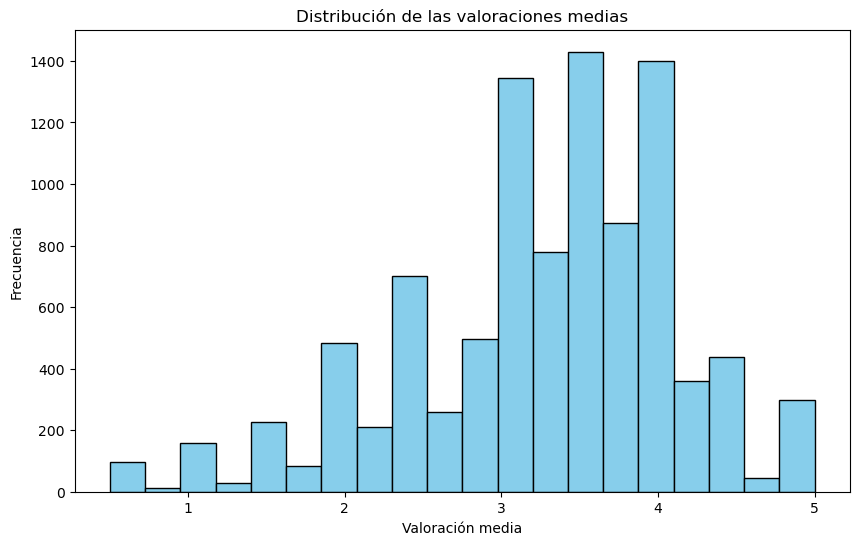

In [60]:
import matplotlib.pyplot as plt

# 1. Histograma de las valoraciones medias
plt.figure(figsize=(10, 6))
plt.hist(best_movies['mean'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de las valoraciones medias")
plt.xlabel("Valoración media")
plt.ylabel("Frecuencia")
plt.show()

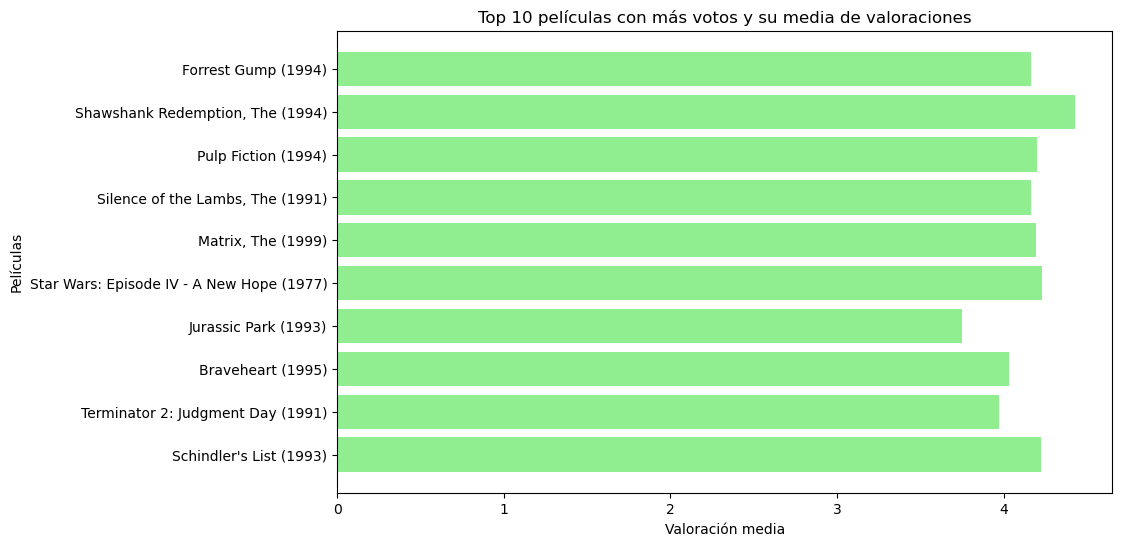

In [62]:
# 3. Top 10 películas con más votos y mejor media
top_10_movies = best_movies.sort_values(by=["count"], ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies.index, top_10_movies['mean'], color='lightgreen')
plt.title("Top 10 películas con más votos y su media de valoraciones")
plt.xlabel("Valoración media")
plt.ylabel("Películas")
plt.gca().invert_yaxis()  # Invertir el eje Y
plt.show()

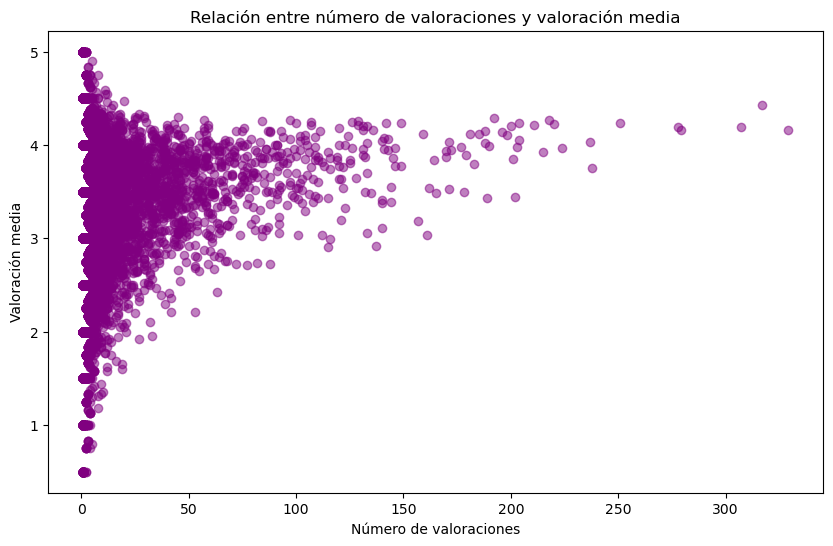

In [63]:
# 4. Relación entre el número de valoraciones y la valoración media
plt.figure(figsize=(10, 6))
plt.scatter(best_movies['count'], best_movies['mean'], alpha=0.5, color='purple')
plt.title("Relación entre número de valoraciones y valoración media")
plt.xlabel("Número de valoraciones")
plt.ylabel("Valoración media")
plt.show()

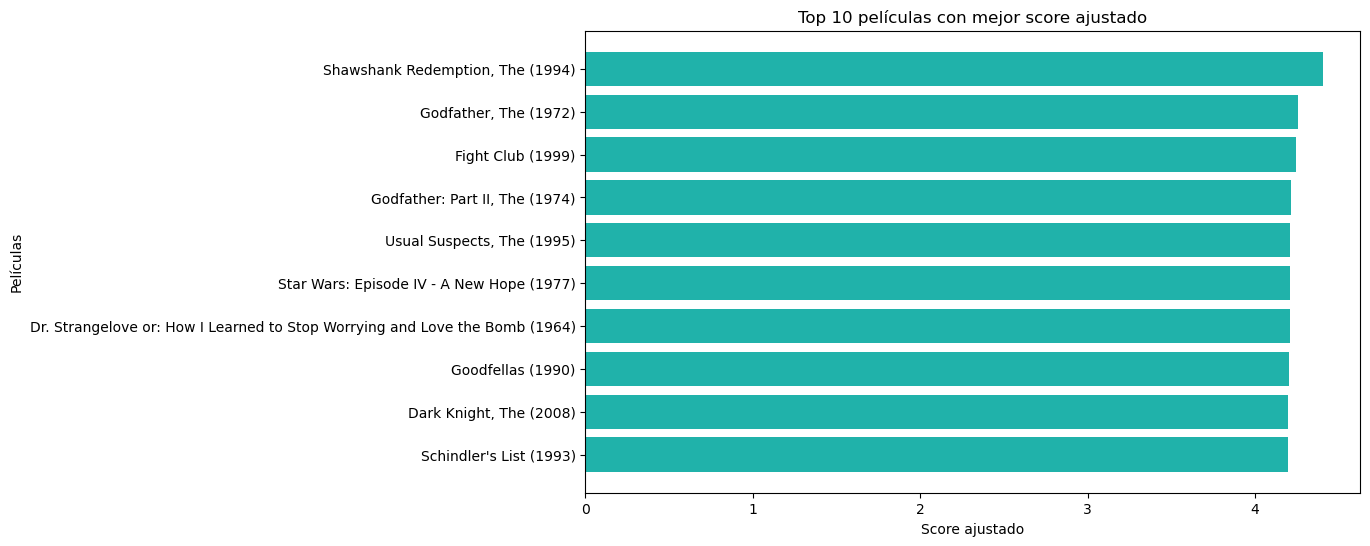

In [64]:
# 5. Mejor score ajustado (usando el score que ya calculaste)
plt.figure(figsize=(10, 6))
best_movies['score'] = best_movies.apply(lambda x: (x['mean'] * x['count'] + 2.5) / (x['count'] + 2), axis=1)
top_score_movies = best_movies.sort_values(by='score', ascending=False).head(10)
plt.barh(top_score_movies.index, top_score_movies['score'], color='lightseagreen')
plt.title("Top 10 películas con mejor score ajustado")
plt.xlabel("Score ajustado")
plt.ylabel("Películas")
plt.gca().invert_yaxis()  # Invertir el eje Y
plt.show()

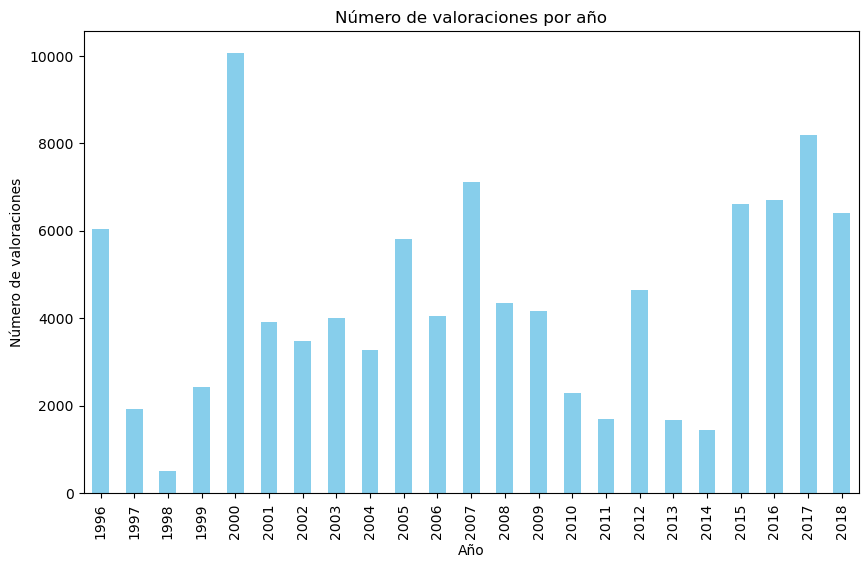

In [75]:
# Convertir el timestamp en un formato de fecha
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday  # Lunes = 0, Domingo = 6

# Análisis de las valoraciones por año y mes
plt.figure(figsize=(10, 6))
df.groupby('year').size().plot(kind='bar', color='skyblue')
plt.title("Número de valoraciones por año")
plt.xlabel("Año")
plt.ylabel("Número de valoraciones")
plt.show()


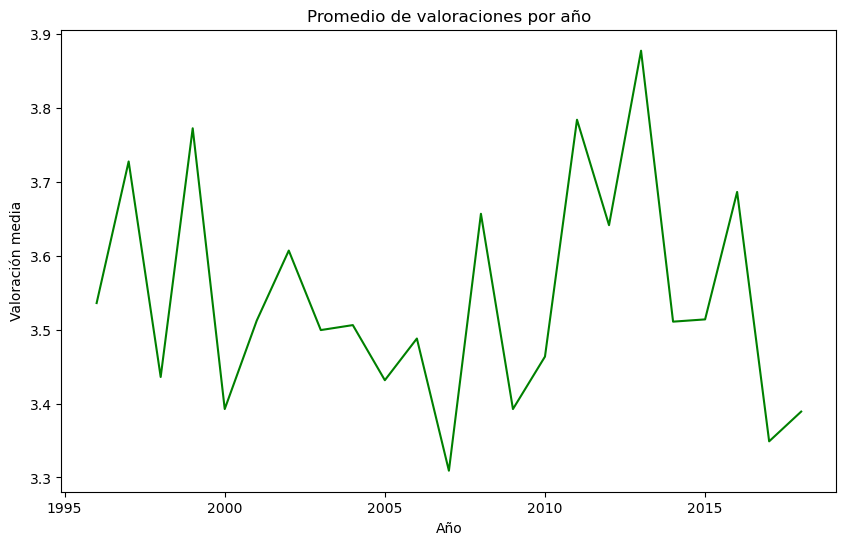

In [73]:
# Promedio de valoraciones por año
avg_ratings_by_year = df.groupby('year')['rating'].mean()

# Visualización
plt.figure(figsize=(10, 6))
avg_ratings_by_year.plot(kind='line', color='green')
plt.title("Promedio de valoraciones por año")
plt.xlabel("Año")
plt.ylabel("Valoración media")
plt.show()


In [76]:
# Convertir timestamp en formato de fecha
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Extraer el mes y el año de la fecha
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month_name()  # Usar nombre del mes (enero, febrero, etc.)

# Verificar las valoraciones por mes
ratings_by_month = df.groupby('month').size()

# Reordenar los meses para que aparezcan en el orden correcto (de enero a diciembre)
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ratings_by_month = ratings_by_month[ordered_months]

# Visualizar las valoraciones por mes
plt.figure(figsize=(10, 6))
ratings_by_month.plot(kind='bar', color='lightcoral')
plt.title("Número de valoraciones por mes")
plt.xlabel("Mes")
plt.ylabel("Número de valoraciones")
plt.xticks(rotation=45)
plt.show()

In [77]:
# Observo que tienen solo 1 voto. No me parece lo suficientemente relevante. Puede que me convenga mirar esto: https://www.youtube.com/watch?v=8idr1WZ1A7Q&t=84s
# Vamos a pedir ayuda a Laplace!
best_movies['score'] = best_movies.apply(lambda x: (x['mean']*x['count']+2.5)/(x['count']+2), axis=1)
best_movies.sort_values(by=["score"], ascending=False)

mean  count     score
title                                                                        
Shawshank Redemption, The (1994)                    4.429022    317  4.409091
Godfather, The (1972)                               4.289062    192  4.257732
Fight Club (1999)                                   4.272936    218  4.245455
Godfather: Part II, The (1974)                      4.259690    129  4.213740
Usual Suspects, The (1995)                          4.237745    204  4.208738
...                                                      ...    ...       ...
War Room (2015)                                     0.500000      1  1.000000
Police Academy: Mission to Moscow (1994)            0.800000      5  0.928571
House Party 2 (1991)                                0.750000      4  0.916667
Cyborg (1989)                                       0.500000      2  0.875000
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2...  0.500000      2  0.875000

[9719 rows x 3 columns]

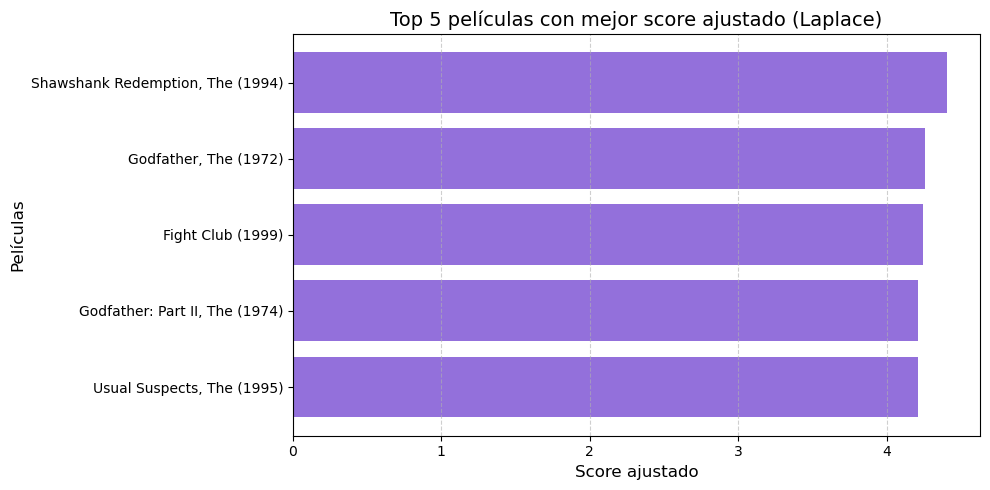

In [81]:
import matplotlib.pyplot as plt

# Filtro: películas con al menos un número mínimo de votos
umbral_votos = 50
relevant_scores = best_movies[best_movies['count'] >= umbral_votos]

# Ordenar por score y quedarnos con el top 5
top_5_laplace = relevant_scores.sort_values(by='score', ascending=False).head(5)

# Gráfico
plt.figure(figsize=(10, 5))
plt.barh(top_5_laplace.index, top_5_laplace['score'], color='mediumpurple')
plt.title("Top 5 películas con mejor score ajustado (Laplace)", fontsize=14)
plt.xlabel("Score ajustado", fontsize=12)
plt.ylabel("Películas", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [86]:
# Sistema de recomendación basado en contenido
# Utiliza características de las películas (por ejemplo, género, duración, año) para recomendar películas similares

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer

# Supongamos que tienes un DataFrame 'movies' con una columna 'genre'
# Convertimos los géneros en variables binarias
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genres'].str.split('|'))
genre_df = pd.DataFrame(genre_matrix, index=movies.index, columns=mlb.classes_)

# Similaridad de coseno entre películas por género
similarity_matrix = cosine_similarity(genre_df)

# Mostrar películas similares a una seleccionada
selected_movie_index = 0  # puedes cambiar esto por el índice de una película
similar_scores = list(enumerate(similarity_matrix[selected_movie_index]))
similar_movies = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

# Mostrar las 5 películas más similares
for i, score in similar_movies:
    print(f"{movies.iloc[i]['title']} - Similitud: {score:.2f}")

Antz (1998) - Similitud: 1.00
Toy Story 2 (1999) - Similitud: 1.00
Adventures of Rocky and Bullwinkle, The (2000) - Similitud: 1.00
Emperor's New Groove, The (2000) - Similitud: 1.00
Monsters, Inc. (2001) - Similitud: 1.00


In [88]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Crear la matriz de utilidad usuario × película
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Rellenar con ceros para representar "no rating"
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Convertir a formato disperso para eficiencia
sparse_matrix = csr_matrix(user_movie_matrix_filled.values)

# Inicializar KNN
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(sparse_matrix)

# Simular búsqueda de vecinos del usuario 1
query_index = 1
distances, indices = knn_model.kneighbors(user_movie_matrix_filled.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

# Mostrar usuarios similares
print("Usuarios similares al usuario", query_index)
for i in range(1, len(distances.flatten())):
    print(f"Vecino {i}: Usuario {indices.flatten()[i]}, Distancia: {distances.flatten()[i]:.4f}")


Usuarios similares al usuario 1
Vecino 1: Usuario 365, Distancia: 0.6999
Vecino 2: Usuario 416, Distancia: 0.7196
Vecino 3: Usuario 377, Distancia: 0.7240
Vecino 4: Usuario 549, Distancia: 0.7458
Vecino 5: Usuario 188, Distancia: 0.7575
